In [18]:
from keras.models import Sequential
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
data

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]],
 [[0.05], [0.06], [0.07], [0.08], [0.09]],
 [[0.06], [0.07], [0.08], [0.09], [0.1]],
 [[0.07], [0.08], [0.09], [0.1], [0.11]],
 [[0.08], [0.09], [0.1], [0.11], [0.12]],
 [[0.09], [0.1], [0.11], [0.12], [0.13]],
 [[0.1], [0.11], [0.12], [0.13], [0.14]],
 [[0.11], [0.12], [0.13], [0.14], [0.15]],
 [[0.12], [0.13], [0.14], [0.15], [0.16]],
 [[0.13], [0.14], [0.15], [0.16], [0.17]],
 [[0.14], [0.15], [0.16], [0.17], [0.18]],
 [[0.15], [0.16], [0.17], [0.18], [0.19]],
 [[0.16], [0.17], [0.18], [0.19], [0.2]],
 [[0.17], [0.18], [0.19], [0.2], [0.21]],
 [[0.18], [0.19], [0.2], [0.21], [0.22]],
 [[0.19], [0.2], [0.21], [0.22], [0.23]],
 [[0.2], [0.21], [0.22], [0.23], [0.24]],
 [[0.21], [0.22], [0.23], [0.24], [0.25]],
 [[0.22], [0.23], [0.24], [0.25], [0.26]],
 [[0.23], [0.24], [0.2

In [20]:
target = [(i+5)/100 for i in range(100)]
target

[0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04]

In [21]:
data = np.array(data, dtype=float)
target = np.array(target, dtype=float)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# 모델 생성

In [23]:
model = Sequential()
model.add(LSTM(1, input_dim=1, input_length=5, return_sequences=False))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 모델 학습

In [27]:
history = model.fit(x_train, y_train, epochs=1000, verbose=0)

# 모델 예측 및 시각화

In [28]:
results = model.predict(x_test)

1/1 [==============================] - 0s 30ms/step


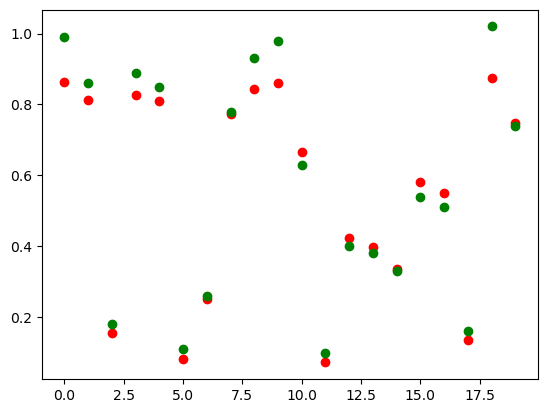

In [29]:
plt.scatter(range(20), results, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

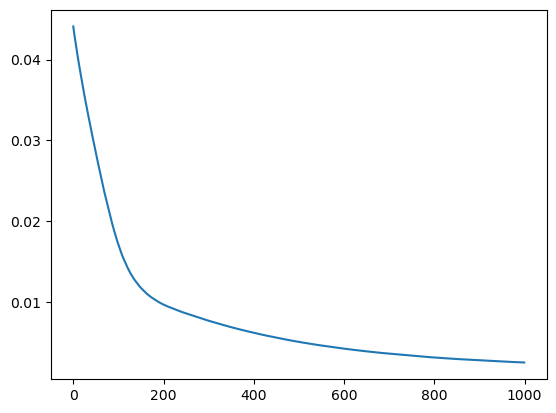

In [30]:
plt.plot(history.history['loss'])
plt.show()